In [39]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

In [40]:
pylab.rcParams['figure.figsize'] = 16, 12
dpii=500;

In [41]:
filename='ATA_data.csv'

In [42]:
df = pd.read_csv(filename)
df =df.drop('Unnamed: 0',1)

In [44]:
df.shape

(1636773, 24)

#### Impressions to install bar plot with relation to the days in a week

In [45]:
df.groupby(['weekday', 'hours']).sum();

In [46]:
df_filter = df[['weekday', 'hours', 'app_type', 'os', 'country', 'impression', 'clicked', 'installed']]

In [47]:
grouped_w=df.groupby('weekday')['impression','installed'].sum()

In [48]:
days=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday', 'Sunday']

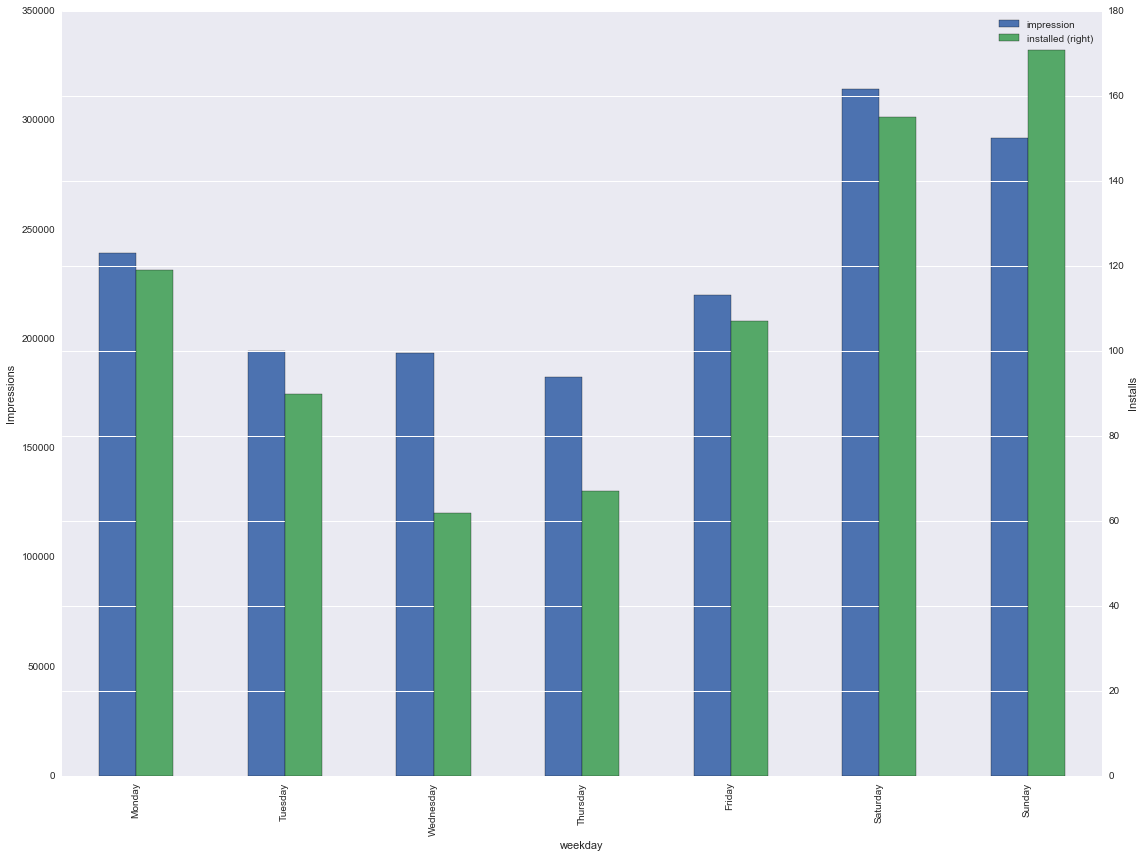

In [49]:
day_plot = grouped_w.plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_w.index-1, days, rotation='vertical');
plt.ylabel('Installs');
day_plot.set_ylabel('Impressions');
plt.tight_layout()
plt.savefig('Impressions_Installs_Daily.png', dpi=dpii)

In [50]:
grouped_wCI=df.groupby('weekday')['clicked','installed'].sum()

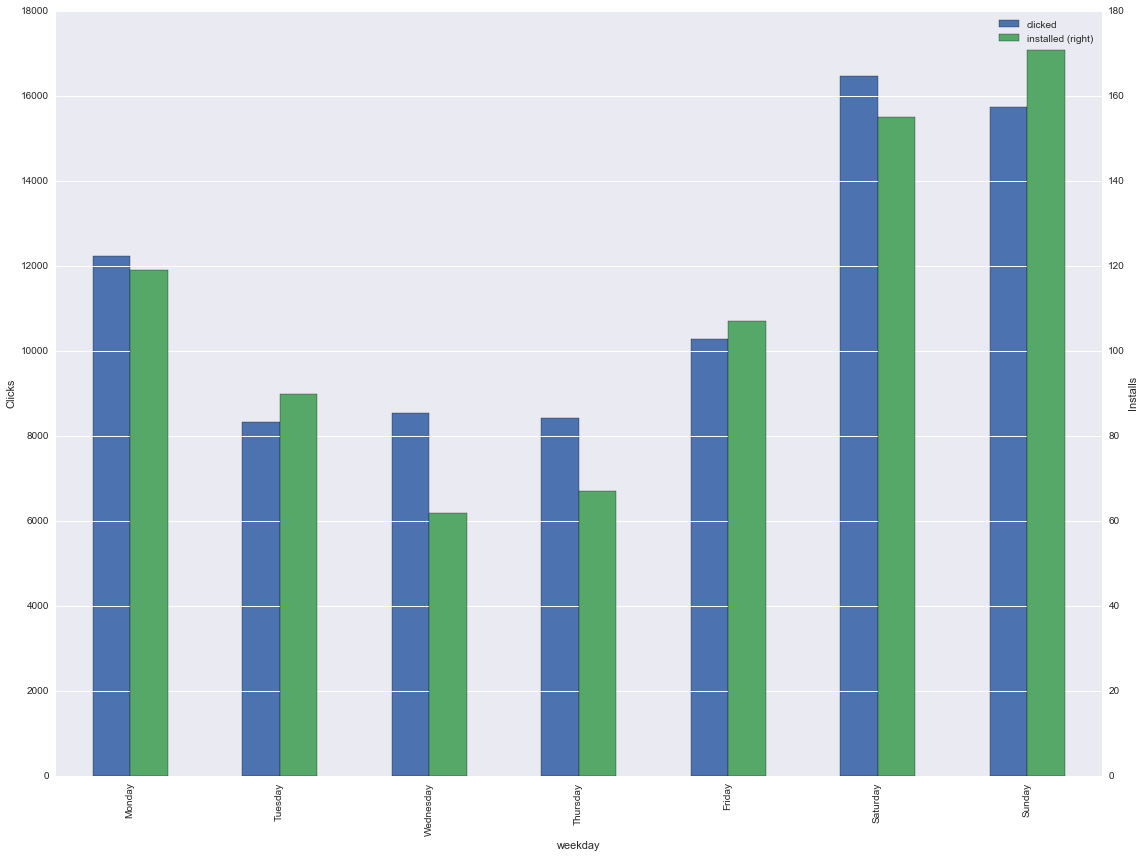

In [51]:
day_plot2 = grouped_wCI.plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_w.index-1, days, rotation='vertical');
plt.ylabel('Installs');
day_plot2.set_ylabel('Clicks');
plt.tight_layout()
plt.savefig('Click_Installs_Daily.png', dpi=dpii)

#### Install to impression bar plot comparison on a per hour basis

In [52]:
grouped_h=df.groupby('hours')['impression','installed'].sum()
grouped_hCI=df.groupby('hours')['clicked','installed'].sum()

In [81]:
df_LA=df[df['city'] == 'Los Angeles']

In [85]:
df_NY=df[df['city'] == 'New York']

In [92]:
dfdf=df[df['country'] == 'CAN']

In [93]:
dfdf.shape

(336567, 24)

In [90]:
grouped_LA=df_LA.groupby('hours')['impression','installed'].sum()
grouped_NY=df_NY.groupby('hours')['impression','installed'].sum()

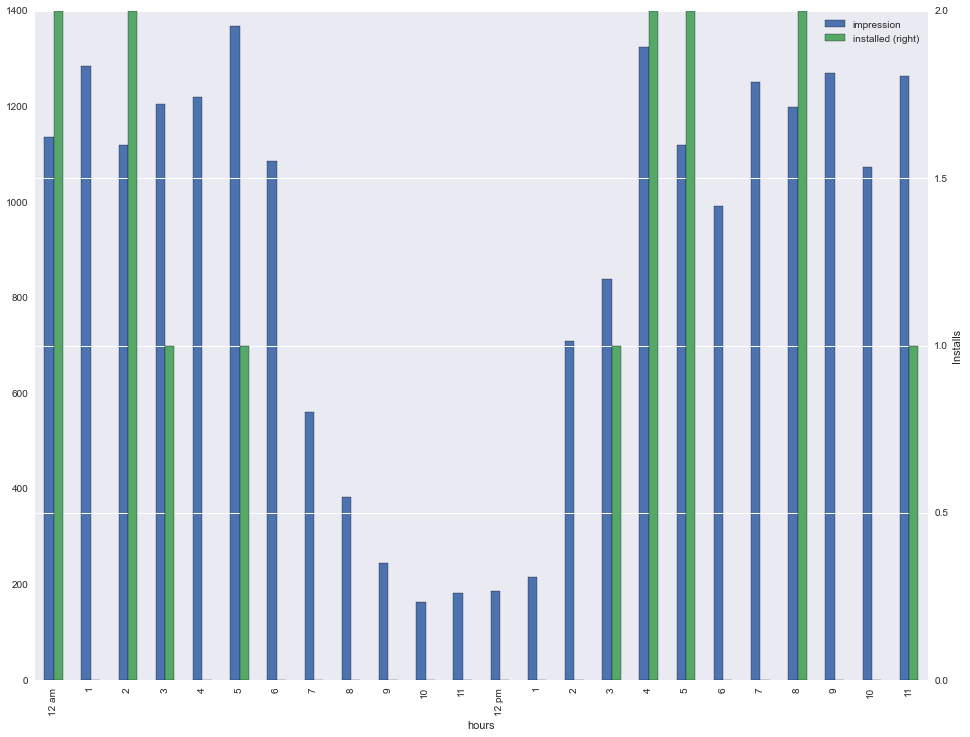

In [89]:
LA_plot = grouped_LA.plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_LA.index, hours, rotation='vertical');
plt.ylabel('Installs');
hr_plot.set_ylabel('Impressions');
#plt.tight_layout()
#plt.savefig('Impression_Installs_Hourly.png', dpi=dpii

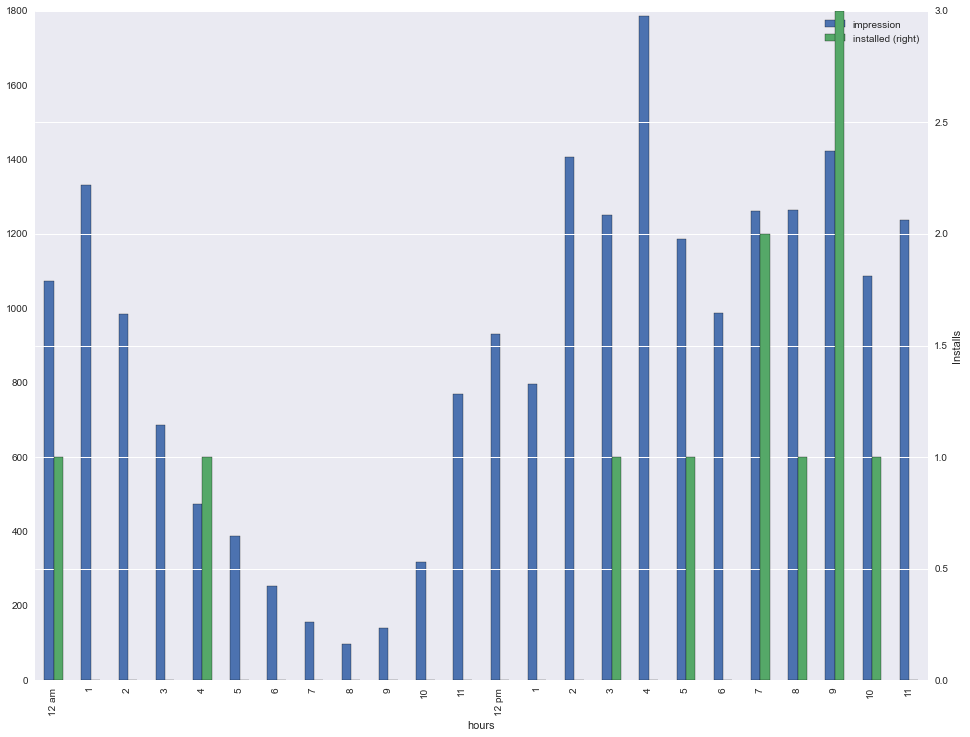

In [91]:
NY_plot = grouped_NY.plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_NY.index, hours, rotation='vertical');
plt.ylabel('Installs');
hr_plot.set_ylabel('Impressions');
#plt.tight_layout()
#plt.savefig('Impression_Installs_Hourly.png', dpi=dpii

In [53]:
grouped_h['ratio']=grouped_h['installed']/grouped_h['impression']*100

In [54]:
hr_range=map(str, range(1,11 + 1))

In [55]:
hours=['12 am'] + hr_range + ['12 pm'] + hr_range

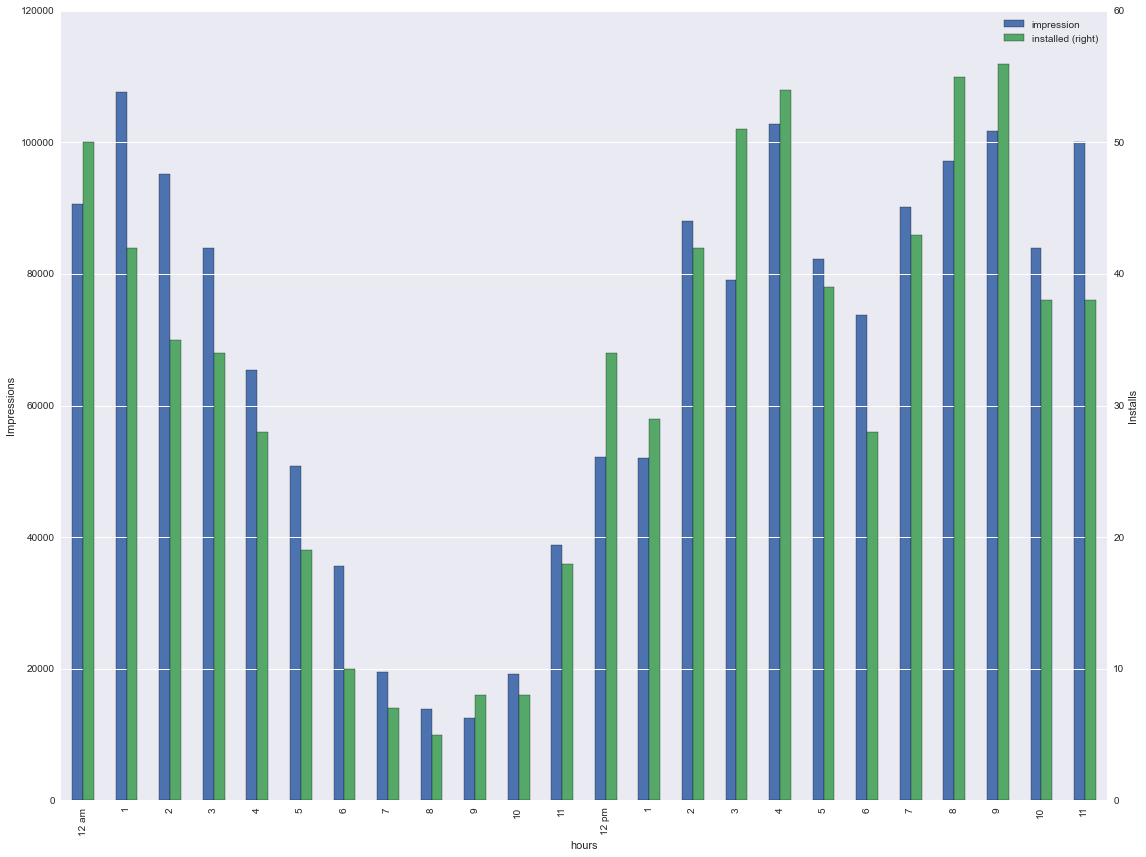

In [56]:
hr_plot = grouped_h.drop('ratio',1).plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_h.index, hours, rotation='vertical');
plt.ylabel('Installs');
hr_plot.set_ylabel('Impressions');
plt.tight_layout()
plt.savefig('Impression_Installs_Hourly.png', dpi=dpii)

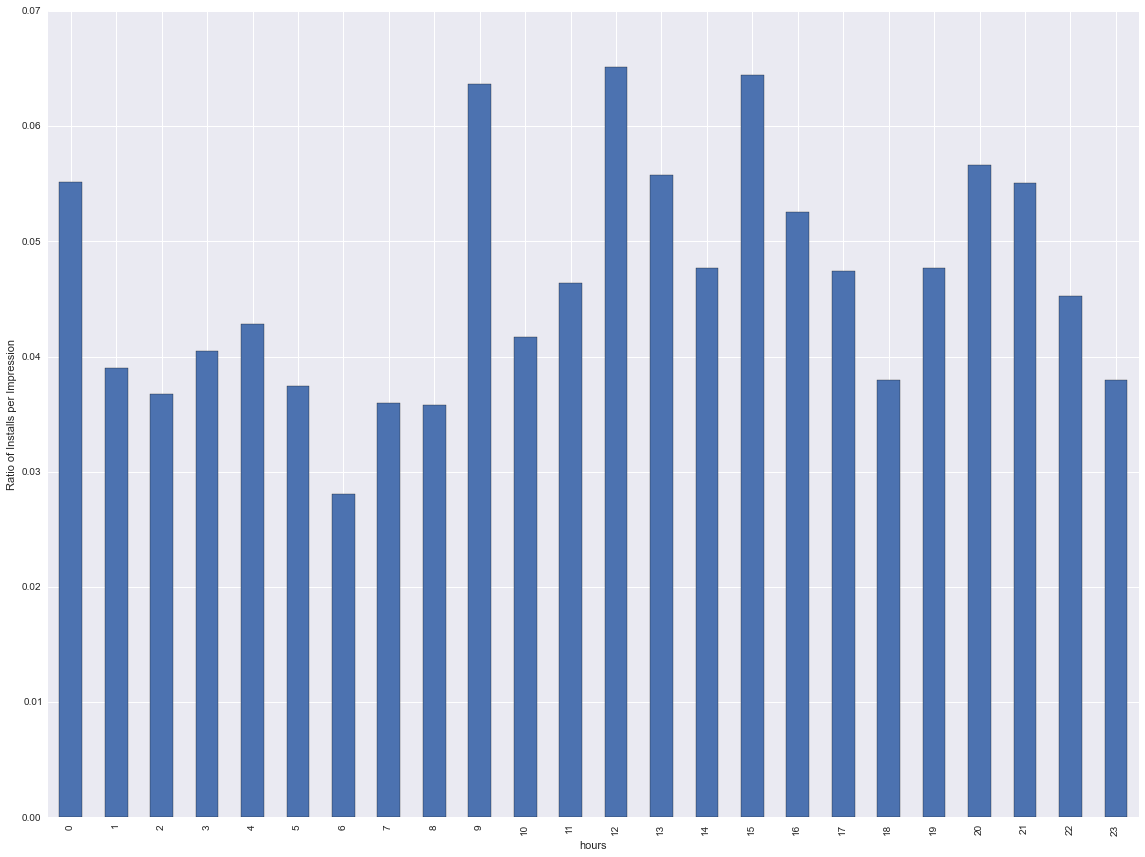

In [57]:
ratio_hr_plot = grouped_h['ratio'].plot(kind = 'bar')
ratio_hr_plot.set_ylabel('Ratio of Installs per Impression');
plt.tight_layout()
plt.savefig('Impressions_Installs_HourlyRatio.png', dpi=dpii)

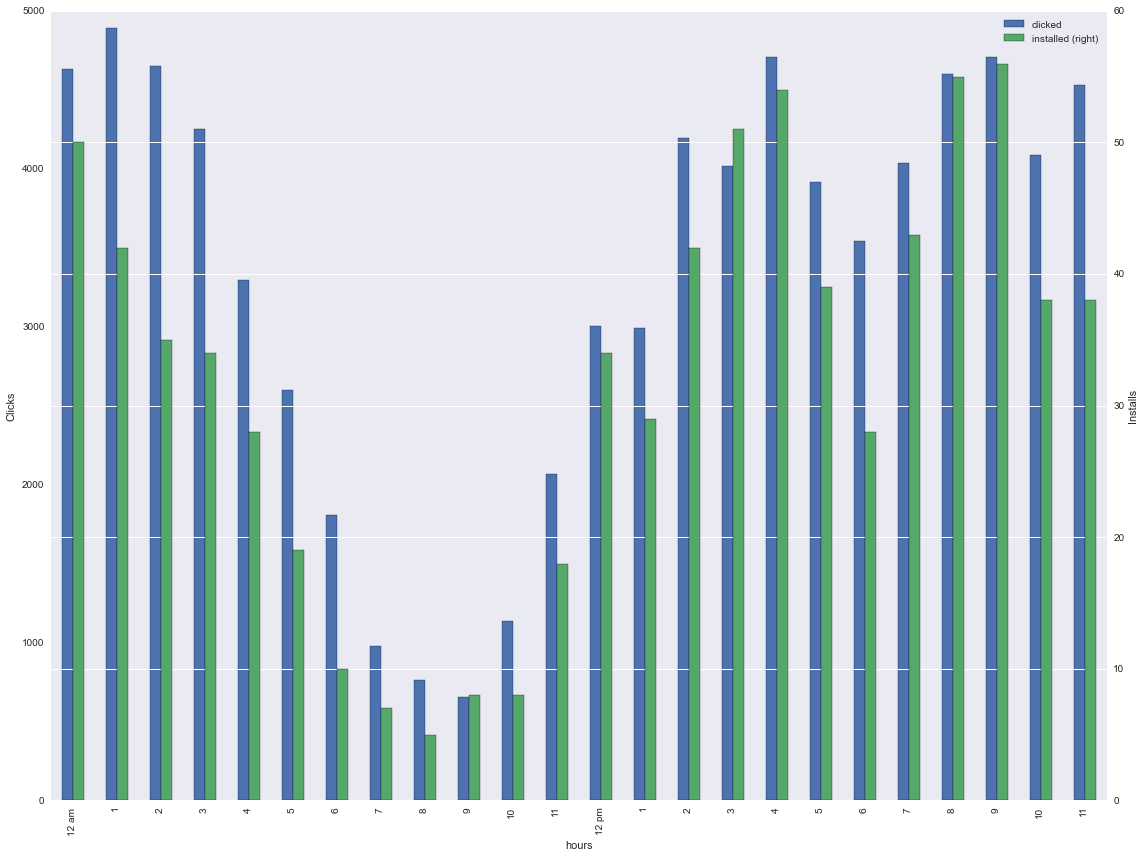

In [58]:
hr_plot2 = grouped_hCI.plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_hCI.index, hours, rotation='vertical');
plt.ylabel('Installs');
hr_plot2.set_ylabel('Clicks');
plt.tight_layout()
plt.savefig('Click_Installs_Hourly.png', dpi=dpii)

In [59]:
grouped_wh_Ins=df.groupby(['weekday', 'hours'])[['installed']].sum()

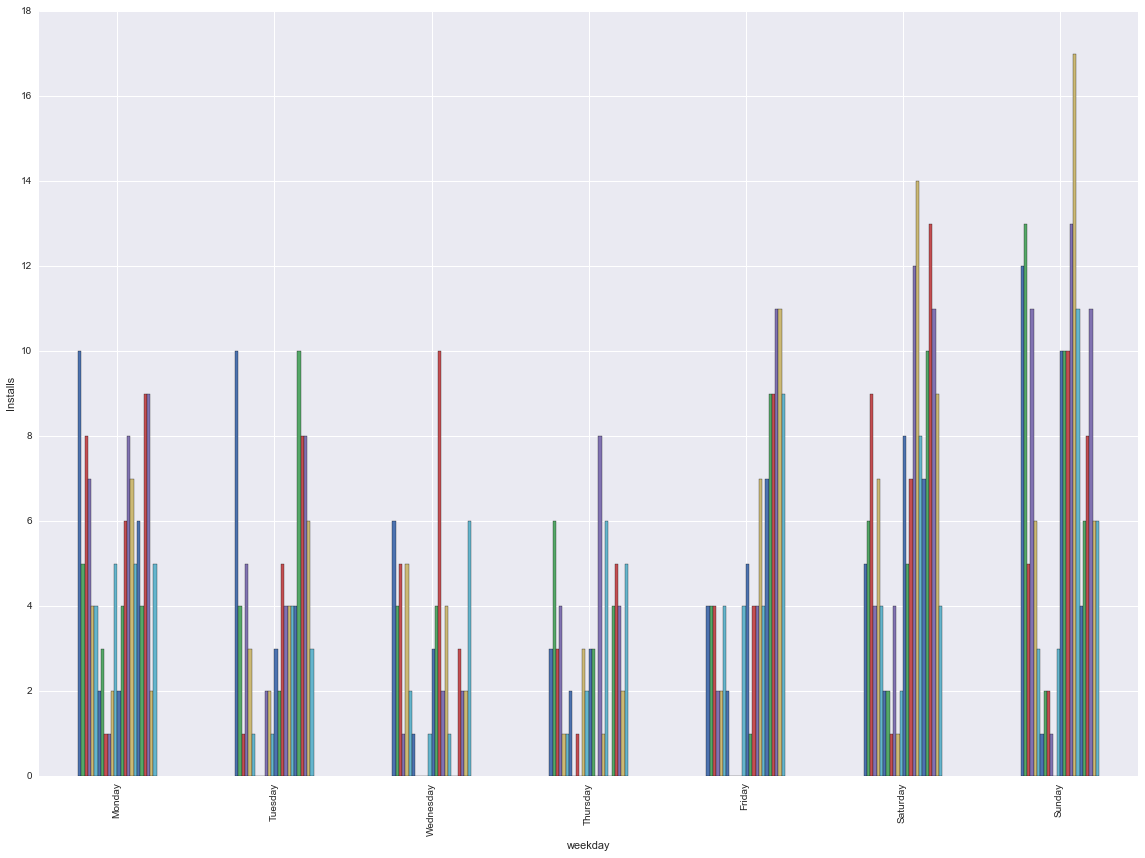

In [60]:
grouped_wh_Ins.unstack().plot(kind='bar', legend=False)
plt.xticks(grouped_wh_Ins.unstack().index-1, days, rotation='vertical');
plt.ylabel('Installs');
plt.tight_layout()
plt.savefig('Installs_Daily_Summary.png', dpi=dpii)

In [61]:
grouped_wh_Imp=df.groupby(['weekday', 'hours'])[['impression']].sum()

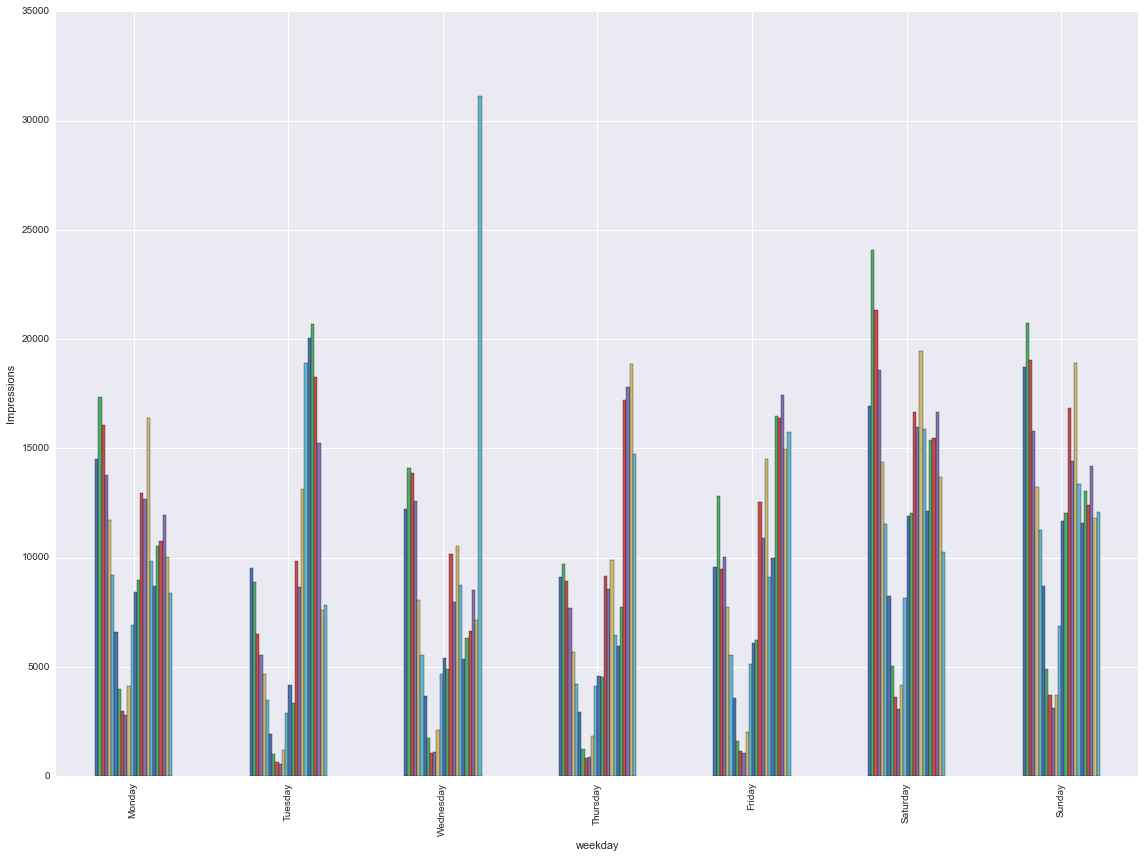

In [62]:
grouped_wh_Imp.unstack().plot(kind='bar', legend=False)
plt.xticks(grouped_wh_Imp.unstack().index-1, days, rotation='vertical');
plt.ylabel('Impressions');
plt.tight_layout()
plt.savefig('Impressions_Daily_Summary.png', dpi=dpii)

In [63]:
grouped_wh_C=df.groupby(['weekday', 'hours'])[['clicked']].sum()

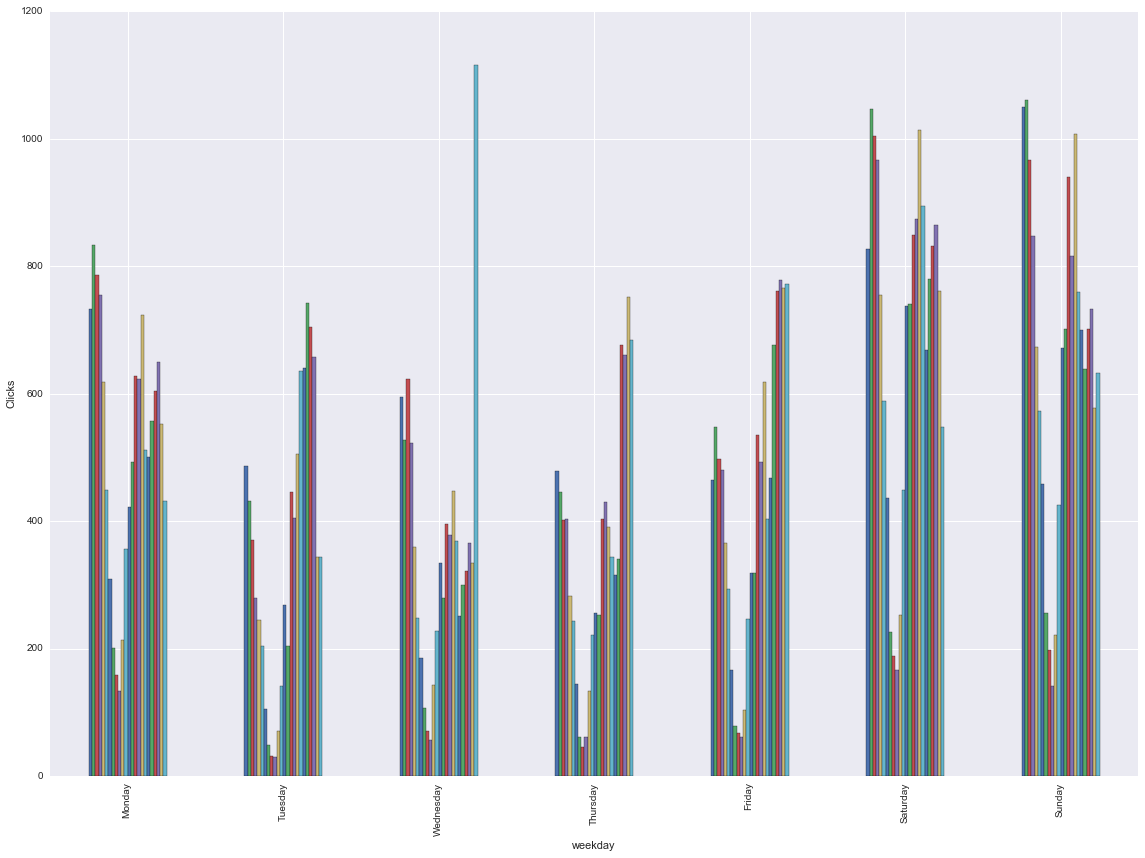

In [64]:
grouped_wh_C.unstack().plot(kind='bar', legend=False)
plt.xticks(grouped_wh_C.unstack().index-1, days, rotation='vertical');
plt.ylabel('Clicks');
plt.tight_layout()
plt.savefig('Clicks_Daily_Summary.png', dpi=dpii)

In [65]:
cols_to_keep=['weekday','hours','impression','installed','clicked', 'app_type']
mini_df=df[cols_to_keep]

In [66]:
grouped_Imp_Ins_Daily=mini_df.groupby(['weekday', 'hours'])[['impression', 'installed']].sum().reset_index()

In [67]:
grouped_Imp_Cli_Daily=mini_df.groupby(['weekday', 'hours'])[['impression', 'clicked']].sum().reset_index()

#### Categorical Inspection

In [68]:
grouped_cat_days=mini_df.groupby(['app_type', 'weekday'])[['impression', 'clicked', 'installed']].sum()

In [69]:
grouped_cat_days=grouped_cat_days.reset_index()

In [70]:
grouped_cat=mini_df.groupby(['app_type'])[['impression', 'clicked', 'installed']].sum()

In [71]:
app_type_index=grouped_cat_days['app_type'].unique()

In [72]:
grouped_cat['ratio']=grouped_cat['installed']/grouped_cat['impression']

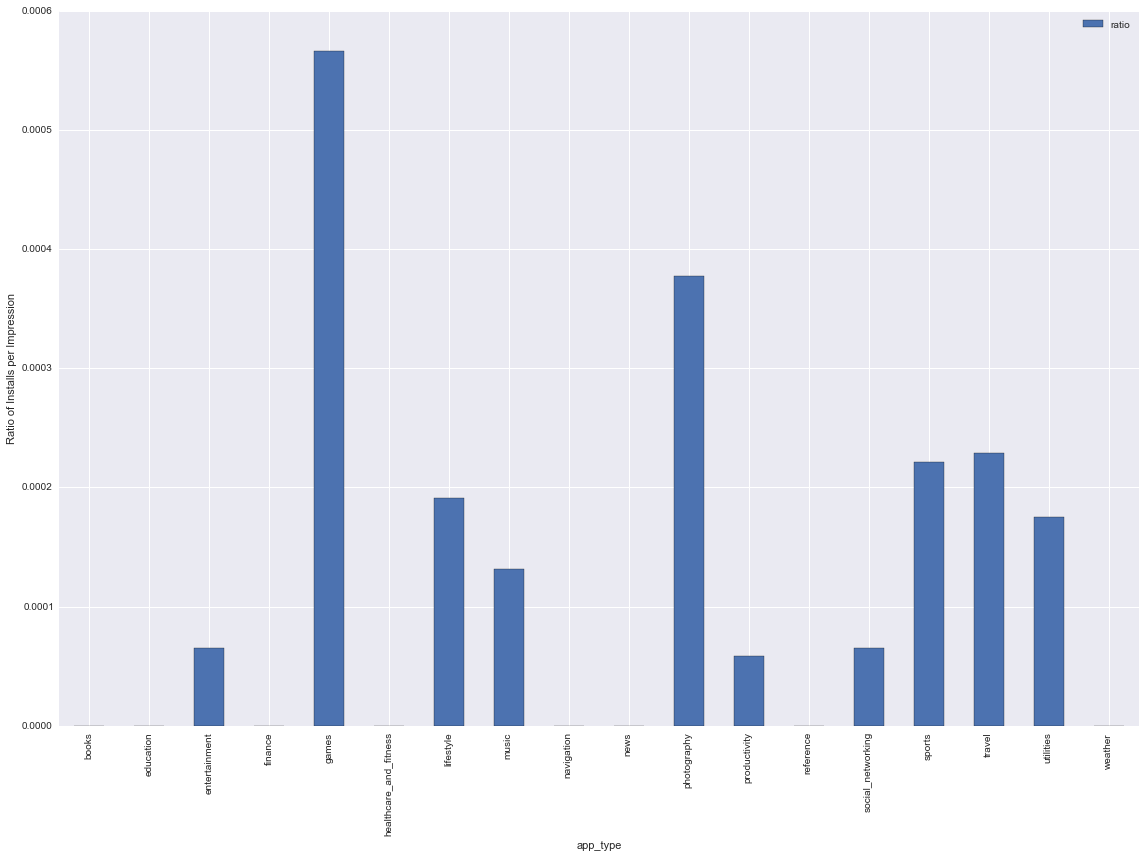

In [73]:
cat_plot = grouped_cat.drop(['clicked', 'installed', 'impression'],1).plot(kind='bar')
plt.xticks(range(0,len(app_type_index)), app_type_index, rotation='vertical');
plt.ylabel('Ratio of Installs per Impression');
hr_plot.set_ylabel('Impressions');
plt.tight_layout()
plt.savefig('Categorical_Feature_Exploration.png', dpi=dpii)

In [74]:
grouped_cat_days['ratio']=grouped_cat_days['clicked']/grouped_cat_days['impression']

In [75]:
grouped_cat_days.groupby('ratio').sum().reset_index();

In [77]:
df[df['impression'] > 5].index

Int64Index([], dtype='int64')

In [78]:
df['impression']

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
           ... 
1636743    True
1636744    True
1636745    True
1636746    True
1636747    True
1636748    True
1636749    True
1636750    True
1636751    True
1636752    True
1636753    True
1636754    True
1636755    True
1636756    True
1636757    True
1636758    True
1636759    True
1636760    True
1636761    True
1636762    True
1636763    True
1636764    True
1636765    True
1636766    True
1636767    True
1636768    True
1636769    True
1636770    True
1636771    True
1636772    True
Name: impression, dtype: